In [ ]:
# Name - SAWAN KUMAR
# Email ID - sawankumar19062001@gmail.com
# Contact Number - 8882022191
# Course - Data Science with Generative AI
# Assignment - EDA
# Module - 3 (Milestone 3 (Machine Learning))







# **EDA - 1**

#About - Dataset:
Here is the dataset link: [Bike Details Dataset](https://drive.google.com/file/d/1iKy23bMtEQShF_weneRNnYrFmzvpPOI3/view)


The dataset provided focuses on used bikes, capturing various attributes to analyze the second-hand bike
market. This dataset helps understand factors influencing resale prices, usage patterns, and market trends for
used bikes.


#Title: Bike Details Dataset
>* Source:
The dataset is available on Kaggle, simulating data commonly observed in real-world online bike resale
platforms.
>* Description:
The dataset comprises 1061 records of used bike listings. These records include details about the bike's brand
and model, selling price, kilometers driven, ownership history, and other attributes. It is particularly useful for
resale value prediction, market analysis, and understanding buyer preferences.

The dataset consists of 7 features, combining both numeric and categorical data, offering a comprehensive
view of the second-hand bike market.

#Title: Bike Details Dataset
>* =name: Brand and model name of the bike (Categorical, e.g., "Royal Enfield Classic 350", "Honda Dio")
>* selling_price: Listed selling price in INR (Numeric, e.g., 175000, 45000)
 >*year: Manufacturing year of the bike (Numeric, e.g., 2019, 2015)
 >*seller_type: Seller category, either "Individual" or "Dealer" (Categorical)
 >*owner: Ownership history, e.g., "1st owner", "2nd owner" (Categorical)
 >*km_driven: Total kilometers driven (Numeric, in km, e.g., 12000, 23000)
>* ex_showroom_price: Original showroom price in INR (Numeric, e.g., 148114.0, 89643.0, etc,.).





#Questioins



#1. What is the range of selling prices in the dataset


In [2]:
import pandas as pd

# Load data
bikes = pd.read_csv('BIKE DETAILS.csv')

# Calculate range
min_price = bikes['selling_price'].min()
max_price = bikes['selling_price'].max()
price_range = max_price - min_price

print(f"Minimum Selling Price: ₹{min_price}")
print(f"Maximum Selling Price: ₹{max_price}")
print(f"Range of Selling Prices: ₹{price_range}")

Minimum Selling Price: ₹5000
Maximum Selling Price: ₹760000
Range of Selling Prices: ₹755000


#2. What is the median selling price for bikes in the dataset


In [3]:
median_price = bikes['selling_price'].median()
print(f"Median Selling Price: ₹{median_price}")

Median Selling Price: ₹45000.0


#3. What is the most common seller type

In [4]:
most_common_seller = bikes['seller_type'].mode()[0]
seller_counts = bikes['seller_type'].value_counts()
print(f"Most Common Seller Type: {most_common_seller}")
print(f"Counts:\n{seller_counts}")

Most Common Seller Type: Individual
Counts:
seller_type
Individual    1055
Dealer           6
Name: count, dtype: int64


#4. How many bikes have driven more than 50,000 kilometers

In [5]:
high_km_bikes = bikes[bikes['km_driven'] > 50000].shape[0]
print(f"Number of bikes with km_driven > 50,000: {high_km_bikes}")

Number of bikes with km_driven > 50,000: 170


#5. What is the average km_driven value for each ownership type

In [6]:
avg_km_by_owner = bikes.groupby('owner')['km_driven'].mean().round(2)
print("Average km_driven by Ownership Type:")
print(avg_km_by_owner)

Average km_driven by Ownership Type:
owner
1st owner     32816.58
2nd owner     39288.99
3rd owner     33292.18
4th owner    311500.00
Name: km_driven, dtype: float64


#6. What proportion of bikes are from the year 2015 or older

In [7]:
total_bikes = bikes.shape[0]
bikes_2015_or_older = bikes[bikes['year'] <= 2015].shape[0]
proportion = bikes_2015_or_older / total_bikes
print(f"Proportion of bikes from 2015 or older: {proportion:.2%}")

Proportion of bikes from 2015 or older: 56.64%


#7. What is the trend of missing values across the dataset

In [8]:
missing_values = bikes.isnull().sum()
missing_percentage = (bikes.isnull().mean() * 100).round(2)
print("Missing Values Count:\n", missing_values)
print("\nMissing Values Percentage:\n", missing_percentage)

Missing Values Count:
 name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64

Missing Values Percentage:
 name                  0.0
selling_price         0.0
year                  0.0
seller_type           0.0
owner                 0.0
km_driven             0.0
ex_showroom_price    41.0
dtype: float64


#8. What is the highest ex_showroom_price recorded, and for which bike

In [9]:
max_ex_showroom = bikes['ex_showroom_price'].max()
max_price_bike = bikes[bikes['ex_showroom_price'] == max_ex_showroom]['name'].iloc[0]
print(f"Highest Ex-Showroom Price: ₹{max_ex_showroom}")
print(f"Bike: {max_price_bike}")

Highest Ex-Showroom Price: ₹1278000.0
Bike: Harley-Davidson Street Bob


#9. What is the total number of bikes listed by each seller type

In [10]:
seller_type_counts = bikes['seller_type'].value_counts()
print("Number of Bikes by Seller Type:")
print(seller_type_counts)

Number of Bikes by Seller Type:
seller_type
Individual    1055
Dealer           6
Name: count, dtype: int64


#10. What is the relationship between selling_price and km_driven for first-owner bikes

In [11]:
first_owner_bikes = bikes[bikes['owner'] == '1st owner']
correlation = first_owner_bikes['selling_price'].corr(first_owner_bikes['km_driven']).round(2)
print(f"Correlation between selling_price and km_driven (1st owner): {correlation}")

Correlation between selling_price and km_driven (1st owner): -0.24


#11. Identify and remove outliers in the km_driven column using the IQR method

In [12]:
# Calculate IQR
Q1 = bikes['km_driven'].quantile(0.25)
Q3 = bikes['km_driven'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = bikes[(bikes['km_driven'] < lower_bound) | (bikes['km_driven'] > upper_bound)]
print(f"Number of outliers in km_driven: {outliers.shape[0]}")

# Remove outliers
bikes_no_outliers = bikes[(bikes['km_driven'] >= lower_bound) & (bikes['km_driven'] <= upper_bound)]
print(f"Shape after removing outliers: {bikes_no_outliers.shape}")

Number of outliers in km_driven: 39
Shape after removing outliers: (1022, 7)


#12. Perform a bivariate analysis to visualize the relationship between year and selling_price

In [13]:
# Sample data for Chart.js (actual data computed similarly)
year_price_data = bikes.groupby('year')['selling_price'].mean().reset_index()

#13. What is the average depreciation in selling price based on the bike's age (current year - manufacturing year)

In [14]:
# Add age column
bikes['age'] = 2025 - bikes['year']
# Calculate depreciation (only for rows with ex_showroom_price)
bikes_with_ex = bikes.dropna(subset=['ex_showroom_price']).copy()
bikes_with_ex['depreciation'] = (bikes_with_ex['ex_showroom_price'] - bikes_with_ex['selling_price']) / bikes_with_ex['age']
avg_depreciation = bikes_with_ex['depreciation'].mean().round(2)
print(f"Average Annual Depreciation: ₹{avg_depreciation}")

Average Annual Depreciation: ₹2666.56


#14. Which bike names are priced significantly above the average price for their manufacturing year

In [15]:
# Calculate mean and std by year
year_stats = bikes.groupby('year')['selling_price'].agg(['mean', 'std']).reset_index()
year_stats['threshold'] = year_stats['mean'] + year_stats['std']

# Merge with original data
bikes_with_stats = bikes.merge(year_stats[['year', 'mean', 'threshold']], on='year')
high_priced_bikes = bikes_with_stats[bikes_with_stats['selling_price'] > bikes_with_stats['threshold']][['name', 'year', 'selling_price', 'mean']]
print("Bikes Priced Significantly Above Average for Their Year:")
print(high_priced_bikes)

Bikes Priced Significantly Above Average for Their Year:
                                     name  year  selling_price           mean
2     Royal Enfield Classic Gunmetal Grey  2018         150000   87660.374046
7    Royal Enfield Bullet 350 [2007-2011]  2008         180000   34289.285714
13                          Yamaha YZF R3  2019         365000  119689.511628
18    Royal Enfield Classic Gunmetal Grey  2018         150000   87660.374046
24          Royal Enfield Thunderbird 350  2016         110000   58469.018692
..                                    ...   ...            ...            ...
976             Royal Enfield Classic 350  2015         110000   56500.000000
979             Royal Enfield Thunder 500  2015         105000   56500.000000
983             Royal Enfield Classic 350  2015         100000   56500.000000
984             Royal Enfield Classic 500  2014          95000   48668.131868
985             Royal Enfield Classic 500  2011          90000   35655.721311

[125 r

#15. Develop a correlation matrix for numeric columns and visualize it using a heatmap.

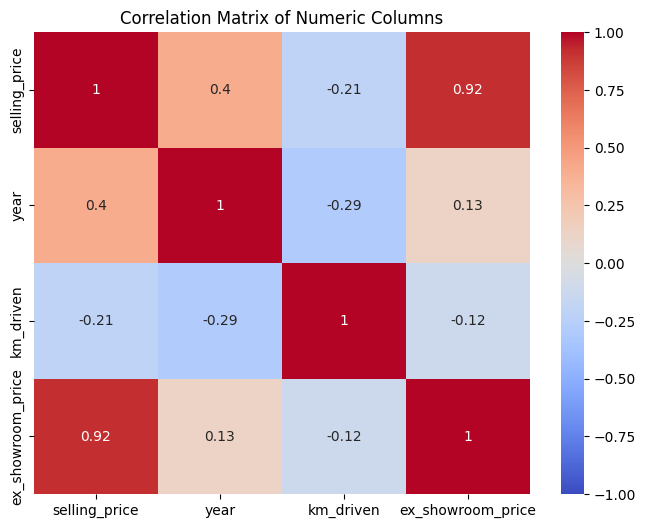

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numeric columns
numeric_cols = ['selling_price', 'year', 'km_driven', 'ex_showroom_price']
corr_matrix = bikes[numeric_cols].corr().round(2)

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Numeric Columns')
plt.show()

# **EDA - 2**










#About - Dataset:

Here is the dataset link: [Car Sales](https://drive.google.com/file/d/1N0kM_zi-iU3yvr6BEJf21aiF599PtA0U/view)

The dataset provided focuses on used car sales, capturing various attributes to analyze the second-hand car
market. This dataset provides insights into factors affecting resale value, trends in the used car industry, and
consumer behavior.

#Title: Car Sales Dataset

>* Source:
The dataset is available on Kaggle, representing data commonly seen in online car resale platforms.
>* Description:
The dataset contains details about used cars listed for sale, such as brand, model, selling price, kilometers
driven, fuel type, and transmission type. This information is valuable for predictive modeling, market analysis,
and understanding customer preferences.

#Features:

>* Car_id: A unique identifier for each car in the dataset, helping to track individual car entries
 >* Date: The date when the car sale transaction took place, formatted as YYYY-MM-DD
 >* Customer Name: The name of the customer who purchased the car, represented as a string
 >* Gender: The gender of the customer, categorized as "Male" or "Female.
 >* Annual Income: The customer's annual income in US dollars, represented as a numeric value
 >* Dealer_Name: The name of the dealership selling the car, represented as a string
 >* Company: The manufacturer or brand name of the car, such as "Toyota," "Ford," etc
 >* Model: The specific model name of the car, such as "Corolla," "Civic," etc
 >* Engine: The engine type of the car, such as "V6," "I4," etc
 >* Transmission: The type of transmission in the car, either "Manual" or "Automatic.
 >* Color: The color of the car, represented as a string (e.g., "Red," "Blue")
 >* Price ($): The selling price of the car in US dollars
 >* Dealer_No: A unique identifier for each car dealer in the dataset
 >* Body Style: The body style of the car, such as "Sedan," "SUV," etc
 >* Phone: The phone number of the customer who purchased the car
 >* Dealer_Region: The geographical region of the car dealer, such as "North," "South," etc.



 # Questions:

 # 1. What is the average selling price of cars for each dealer, and how does it compare across different dealers

In [25]:
import pandas as pd

# Load dataset
df = pd.read_csv('Car Sale.csv')

# Calculate average price by dealer
avg_price = df.groupby('Dealer_Name')['Price ($)'].mean().round(2).sort_values()

# Display results
print("Average Selling Price by Dealer:")
print(avg_price)

Average Selling Price by Dealer:
Dealer_Name
Buddy Storbeck's Diesel Service Inc                27217.26
Pitre Buick-Pontiac-Gmc of Scottsdale              27404.25
Chrysler Plymouth                                  27555.53
McKinney Dodge Chrysler Jeep                       27684.10
Clay Johnson Auto Sales                            27816.03
Nebo Chevrolet                                     27818.89
Hatfield Volkswagen                                27853.71
New Castle Ford Lincoln Mercury                    27867.13
Progressive Shippers Cooperative Association No    27884.26
Ryder Truck Rental and Leasing                     27914.99
Motor Vehicle Branch Office                        27956.74
Diehl Motor CO Inc                                 27993.93
Pars Auto Sales                                    28013.06
Tri-State Mack Inc                                 28095.56
C & M Motors Inc                                   28111.76
Suburban Ford                                      2811

# 2.What is the average selling price of cars for each dealer, and how does it compare across different dealers

In [27]:
import pandas as pd

# Load dataset
df = pd.read_csv('Car Sale.csv')

# Calculate standard deviation of price by company
price_std = df.groupby('Company')['Price ($)'].std().round(2).sort_values(ascending=False)

# Display results
print("Price Variation by Company (Standard Deviation):")
print(price_std)
print(f"\nCompany with highest variation: {price_std.index[0]} (${price_std.iloc[0]:.2f})")

Price Variation by Company (Standard Deviation):
Company
Lincoln       19658.05
Saab          19653.74
Cadillac      19517.12
Plymouth      19066.00
Lexus         17852.92
Buick         17142.23
Mercury       16445.17
Nissan        16214.26
Saturn        15990.22
Ford          15849.09
Mercedes-B    15722.81
Oldsmobile    15711.35
Toyota        15367.13
BMW           15065.58
Pontiac       14348.96
Infiniti      13696.33
Chevrolet     13311.06
Volvo         12933.79
Subaru        12920.77
Audi          12904.24
Volkswagen    12527.12
Mitsubishi    11671.34
Chrysler      11583.29
Dodge         11187.59
Honda         11148.63
Jaguar        10222.53
Jeep           9459.83
Acura          8183.05
Porsche        5261.84
Hyundai        3485.98
Name: Price ($), dtype: float64

Company with highest variation: Lincoln ($19658.05)


#3. What is the distribution of car prices for each transmission type, and how do the interquartile ranges compare

In [28]:
import pandas as pd

# Load dataset
df = pd.read_csv('Car Sale.csv')

# Calculate price distribution by transmission
dist = df.groupby('Transmission')['Price ($)'].describe()[['min', '25%', '50%', '75%', 'max']].round(2)
dist['IQR'] = (dist['75%'] - dist['25%']).round(2)

# Display results
print("Price Distribution by Transmission Type:")
print(dist)

Price Distribution by Transmission Type:
                 min      25%      50%      75%      max      IQR
Transmission                                                     
Auto          1200.0  19000.0  24000.0  35500.0  75700.0  16500.0
Manual        1700.0  17000.0  22001.0  34000.0  85800.0  17000.0


#4. What is the distribution of car prices across different regions

In [29]:
import pandas as pd

# Load dataset
df = pd.read_csv('Car Sale.csv')

# Calculate price distribution by region
dist = df.groupby('Dealer_Region')['Price ($)'].describe()[['min', '25%', '50%', '75%', 'max']].round(2)
dist['IQR'] = (dist['75%'] - dist['25%']).round(2)

# Display results
print("Price Distribution by Region:")
print(dist)

Price Distribution by Region:
                  min      25%      50%      75%      max      IQR
Dealer_Region                                                     
Aurora         9000.0  18001.0  23000.0  35000.0  85800.0  16999.0
Austin         9000.0  18001.0  23801.0  35001.0  85601.0  17000.0
Greenville     1200.0  18001.0  22500.0  34500.0  85200.0  16499.0
Janesville     4300.0  18001.0  23000.0  34000.0  85400.0  15999.0
Middletown     1700.0  18000.0  22750.0  34000.0  85300.0  16000.0
Pasco          9000.0  18500.5  23000.0  34000.0  85600.0  15499.5
Scottsdale     1450.0  18000.0  22600.0  33500.0  85001.0  15500.0


#5. What is the distribution of cars based on body styles

In [30]:
import pandas as pd

# Load dataset
df = pd.read_csv('Car Sale.csv')

# Count cars by body style
body_style_dist = df['Body Style'].value_counts()
percentage = (body_style_dist / len(df) * 100).round(2)

# Combine counts and percentages
result = pd.DataFrame({'Count': body_style_dist, 'Percentage (%)': percentage})

# Display results
print("Distribution of Cars by Body Style:")
print(result)

Distribution of Cars by Body Style:
            Count  Percentage (%)
Body Style                       
SUV          6374           26.66
Hatchback    6128           25.63
Sedan        4488           18.77
Passenger    3945           16.50
Hardtop      2971           12.43


#6. How does the average selling price of cars vary by customer gender and annual income

In [31]:
import pandas as pd

# Load dataset
df = pd.read_csv('Car Sale.csv')

# Define income brackets
bins = [0, 50000, 100000, 500000, 1000000, float('inf')]
labels = ['< $50K', '$50K-$100K', '$100K-$500K', '$500K-$1M', '> $1M']
df['Income Bracket'] = pd.cut(df['Annual Income'], bins=bins, labels=labels, include_lowest=True)

# Calculate average price by gender and income bracket
avg_price = df.groupby(['Gender', 'Income Bracket'])['Price ($)'].mean().round(2)

# Display results
print("Average Car Price by Gender and Income Bracket:")
print(avg_price)

Average Car Price by Gender and Income Bracket:
Gender  Income Bracket
Female  < $50K            28132.04
        $50K-$100K             NaN
        $100K-$500K       28635.03
        $500K-$1M         28070.24
        > $1M             28579.63
Male    < $50K            27816.30
        $50K-$100K        43000.00
        $100K-$500K       28537.17
        $500K-$1M         27993.61
        > $1M             28105.56
Name: Price ($), dtype: float64


<ipython-input-31-ebca38cb1f83>:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_price = df.groupby(['Gender', 'Income Bracket'])['Price ($)'].mean().round(2)


#7. What is the distribution of car prices by region, and how does the number of cars sold vary by region

In [32]:
import pandas as pd

# Load dataset
df = pd.read_csv('Car Sale.csv')

# Count cars sold by region
region_sales = df['Dealer_Region'].value_counts()
percentage = (region_sales / len(df) * 100).round(2)

# Combine counts and percentages
result = pd.DataFrame({'Cars Sold': region_sales, 'Percentage (%)': percentage})

# Display results
print("Number of Cars Sold by Region:")
print(result)

Number of Cars Sold by Region:
               Cars Sold  Percentage (%)
Dealer_Region                           
Austin              4135           17.30
Janesville          3821           15.98
Scottsdale          3433           14.36
Pasco               3131           13.10
Aurora              3130           13.09
Greenville          3128           13.08
Middletown          3128           13.08


#8. How does the average car price differ between cars with different engine sizes

In [33]:
import pandas as pd

# Load dataset
df = pd.read_csv('Car Sale.csv')

# Calculate average price by engine type
avg_price = df.groupby('Engine')['Price ($)'].mean().round(2)

# Display results
print("Average Car Price by Engine Type:")
print(avg_price)

Average Car Price by Engine Type:
Engine
DoubleÂ Overhead Camshaft    28248.53
Overhead Camshaft            27914.71
Name: Price ($), dtype: float64


#9. How do car prices vary based on the customer’s annual income bracket

In [34]:
import pandas as pd

# Load dataset
df = pd.read_csv('Car Sale.csv')

# Define income brackets
bins = [0, 50000, 100000, 500000, 1000000, float('inf')]
labels = ['< $50K', '$50K-$100K', '$100K-$500K', '$500K-$1M', '> $1M']
df['Income Bracket'] = pd.cut(df['Annual Income'], bins=bins, labels=labels, include_lowest=True)

# Calculate price distribution by income bracket
dist = df.groupby('Income Bracket')['Price ($)'].describe()[['min', '25%', '50%', '75%', 'max']].round(2)
dist['IQR'] = (dist['75%'] - dist['25%']).round(2)

# Display results
print("Price Distribution by Income Bracket:")
print(dist)

Price Distribution by Income Bracket:
                    min      25%      50%      75%      max      IQR
Income Bracket                                                      
< $50K           1200.0  18000.0  22001.0  34000.0  85001.0  16000.0
$50K-$100K      43000.0  43000.0  43000.0  43000.0  43000.0      0.0
$100K-$500K      9000.0  18501.0  24000.0  36000.0  85500.0  17499.0
$500K-$1M        4200.0  18000.0  23000.0  34000.0  85001.0  16000.0
> $1M            1450.0  18500.0  23000.0  34001.0  85800.0  15501.0


<ipython-input-34-780f8cb6b64f>:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dist = df.groupby('Income Bracket')['Price ($)'].describe()[['min', '25%', '50%', '75%', 'max']].round(2)


#10. What are the top 5 car models with the highest number of sales, and how does their price distribution look

In [35]:
import pandas as pd

# Load dataset
df = pd.read_csv('Car Sale.csv')

# Get top 5 models by sales
top_models = df['Model'].value_counts().head(5).index

# Filter data for top models
top_df = df[df['Model'].isin(top_models)]

# Calculate price distribution for top models
dist = top_df.groupby('Model')['Price ($)'].describe()[['min', '25%', '50%', '75%', 'max']].round(2)
dist['IQR'] = (dist['75%'] - dist['25%']).round(2)

# Display results
print("Top 5 Car Models by Sales and Price Distribution:")
print(dist)

Top 5 Car Models by Sales and Price Distribution:
                min      25%      50%      75%      max      IQR
Model                                                           
Diamante    12000.0  18000.0  19001.0  22000.0  49801.0   4000.0
Passat       9000.0  12001.0  20000.0  27001.0  32501.0  15000.0
Prizm       15000.0  16000.0  22000.0  25000.0  44700.0   9000.0
Ram Pickup  16000.0  19000.0  21000.0  39300.0  57750.0  20300.0
Silhouette  12000.0  14001.0  25000.0  34500.0  60750.0  20499.0


#11. How does car price vary with engine size across different car colors, and which colors have the highest price variation

In [36]:
import pandas as pd

# Load dataset
df = pd.read_csv('Car Sale.csv')

# Calculate mean and standard deviation by engine and color
stats = df.groupby(['Engine', 'Color'])['Price ($)'].agg(['mean', 'std']).round(2)

# Display results
print("Price Variation by Engine Type and Color:")
print(stats)

Price Variation by Engine Type and Color:
                                          mean       std
Engine                    Color                         
DoubleÂ Overhead Camshaft Black       25766.45  12418.67
                          Pale White  30347.99  14402.41
                          Red         27434.39  13499.35
Overhead Camshaft         Black       31732.97  17457.41
                          Pale White  24327.77  13000.10
                          Red         30153.41  17346.64


#12. Is there any seasonal trend in car sales based on the date of sale

In [37]:
import pandas as pd

# Load dataset
df = pd.read_csv('Car Sale.csv')

# Extract month from Date
df['Month'] = pd.to_datetime(df['Date']).dt.strftime('%b')

# Count sales by month
monthly_sales = df['Month'].value_counts().reindex(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Display results
print("Car Sales by Month:")
print(monthly_sales)

Car Sales by Month:
Month
Jan     790
Feb     735
Mar    1535
Apr    1655
May    1895
Jun    1715
Jul    1725
Aug    1705
Sep    3305
Oct    1830
Nov    3470
Dec    3546
Name: count, dtype: int64


#13. How does the car price distribution change when considering different combinations of body style and transmission type

In [38]:
import pandas as pd

# Load dataset
df = pd.read_csv('Car Sale.csv')

# Calculate price distribution by body style and transmission
dist = df.groupby(['Body Style', 'Transmission'])['Price ($)'].describe()[['min', '25%', '50%', '75%', 'max']].round(2)
dist['IQR'] = (dist['75%'] - dist['25%']).round(2)

# Display results
print("Price Distribution by Body Style and Transmission:")
print(dist)

Price Distribution by Body Style and Transmission:
                             min      25%      50%      75%      max      IQR
Body Style Transmission                                                      
Hardtop    Auto          12000.0  21001.0  27000.0  43125.0  75501.0  22124.0
           Manual        11000.0  17575.5  22001.0  29000.0  82500.0  11424.5
Hatchback  Auto           4200.0  18001.0  21500.0  31000.0  75700.0  12999.0
           Manual         1700.0  17000.0  23000.0  36001.0  85600.0  19001.0
Passenger  Auto           9000.0  19000.0  25000.0  38000.0  69801.0  19000.0
           Manual        10000.0  16001.0  22000.0  37000.0  85800.0  20999.0
SUV        Auto           1200.0  19000.0  25000.0  33000.0  75501.0  14000.0
           Manual         2200.0  17000.0  22000.0  28000.0  85500.0  11000.0
Sedan      Auto          12000.0  19000.0  26000.0  39500.0  69980.0  20500.0
           Manual        11000.0  19001.0  25000.0  36600.0  69700.0  17599.0


#14. What is the correlation between car price, engine size, and annual income of customers, and how do these features interact

In [39]:
import pandas as pd

# Load dataset
df = pd.read_csv('Car Sale.csv')

# Encode Engine (Double Overhead Camshaft = 2, Overhead Camshaft = 1)
df['Engine_Encoded'] = df['Engine'].map({'Double Overhead Camshaft': 2, 'Overhead Camshaft': 1})

# Select relevant columns
data = df[['Price ($)', 'Engine_Encoded', 'Annual Income']]

# Calculate correlation matrix
corr_matrix = data.corr().round(3)

# Display results
print("Correlation Matrix (Price, Engine, Annual Income):")
print(corr_matrix)

Correlation Matrix (Price, Engine, Annual Income):
                Price ($)  Engine_Encoded  Annual Income
Price ($)           1.000             NaN          0.012
Engine_Encoded        NaN             NaN            NaN
Annual Income       0.012             NaN          1.000


#15. How does the average car price vary across different car models and engine types?

In [40]:
import pandas as pd

# Load dataset
df = pd.read_csv('Car Sale.csv')

# Calculate average price by model and engine
avg_price = df.groupby(['Model', 'Engine'])['Price ($)'].mean().round(2)

# Display results
print("Average Car Price by Model and Engine Type:")
print(avg_price)

Average Car Price by Model and Engine Type:
Model     Engine                   
3-Sep     DoubleÂ Overhead Camshaft    37986.38
3000GT    DoubleÂ Overhead Camshaft    22764.33
          Overhead Camshaft            21770.66
300M      DoubleÂ Overhead Camshaft    21394.89
323i      DoubleÂ Overhead Camshaft    16744.63
                                         ...   
Windstar  Overhead Camshaft            17100.27
Wrangler  DoubleÂ Overhead Camshaft    21145.29
          Overhead Camshaft            18742.94
Xterra    DoubleÂ Overhead Camshaft    15940.46
          Overhead Camshaft            31072.50
Name: Price ($), Length: 261, dtype: float64


# **EDA - 3**

#Amazon Sales Data
>* Description:
This dataset contains information on 1K+ Amazon products, including their ratings, reviews, and other details.

# Features:
product_id: Unique identifier for each product

product_name: Name of the product

category: Category of the product

discounted_price: Discounted price of the product

actual_price: Actual price of the product

discount_percentage: Percentage of discount for the product

rating: Rating of the product (1-5)

rating_count: Number of people who voted for the Amazon rating

about_product: Description about the product

user_id: ID of the user who wrote the review

user_name: Name of the user who wrote the review

review_id: ID of the user review

review_title: Short review

review_content: Long review

img_link: Image link of the product

product_link: Official website link of the product



#Source: [Amazon Sales](https://drive.google.com/file/d/1yKlW0x5yyRQijmWbEg5YCsq4wqLl3_oB/view)


# Questions
#1. What is the average rating for each product categoryk

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('amazon.csv')

# Extract top-level category (before the first '|')
df['top_category'] = df['category'].str.split('|').str[0]

# Calculate average rating by top-level category
avg_rating = df.groupby('top_category')['rating'].mean().round(2)

# Display results
print("Average Rating by Category:")
print(avg_rating)

#2. What are the top rating_count products by category

In [42]:
import pandas as pd

# Load the dataset
df = pd.read_csv('amazon.csv')

# Extract top-level category
df['top_category'] = df['category'].str.split('|').str[0]

# Find the product with the highest rating_count in each category
top_rating_count = df.loc[df.groupby('top_category')['rating_count'].idxmax()][['top_category', 'product_name', 'rating_count']]

# Display results
print("Top Rating Count Products by Category:")
print(top_rating_count)

Top Rating Count Products by Category:
               top_category  \
1157          Car&Motorbike   
32    Computers&Accessories   
750             Electronics   
1247    Health&PersonalCare   
1279           Home&Kitchen   
982         HomeImprovement   
613      MusicalInstruments   
702          OfficeProducts   
924              Toys&Games   

                                           product_name rating_count  
1157  Reffair AX30 [MAX] Portable Air Purifier for C...        1,118  
32    Zoul USB C 60W Fast Charging 3A 6ft/2M Long Ty...          974  
750        Eveready Red 1012 AAA Batteries - Pack of 10          989  
1247  Dr Trust Electronic Kitchen Digital Scale Weig...        3,663  
1279  Eureka Forbes car Vac 100 Watts Powerful Sucti...          992  
982   Gizga Essentials Cable Organiser, Cord Managem...        5,985  
613   Boya ByM1 Auxiliary Omnidirectional Lavalier C...       68,664  
702   COI Note Pad/Memo Book with Sticky Notes & Cli...        9,344  
924   Faber

#3. What is the distribution of discounted prices vs. actual prices

Discounted Price Statistics:
count     1465.000000
mean      3125.310874
std       6944.304394
min         39.000000
25%        325.000000
50%        799.000000
75%       1999.000000
max      77990.000000
Name: discounted_price, dtype: float64

Actual Price Statistics:
count      1465.000000
mean       5444.990635
std       10874.826864
min          39.000000
25%         800.000000
50%        1650.000000
75%        4295.000000
max      139900.000000
Name: actual_price, dtype: float64


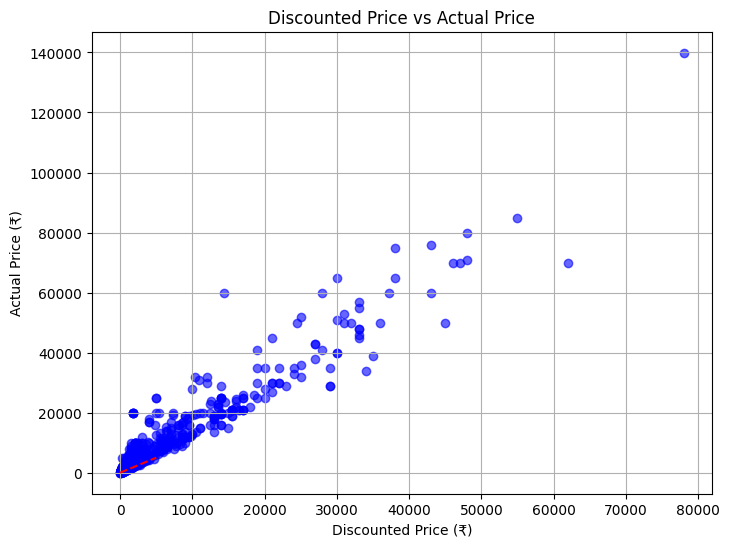

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('amazon.csv')

# Clean price columns by removing '₹' and converting to float
df['discounted_price'] = df['discounted_price'].str.replace('₹', '').str.replace(',', '').astype(float)
df['actual_price'] = df['actual_price'].str.replace('₹', '').str.replace(',', '').astype(float)

# Calculate summary statistics
discounted_stats = df['discounted_price'].describe()
actual_stats = df['actual_price'].describe()

# Display summary statistics
print("Discounted Price Statistics:")
print(discounted_stats)
print("\nActual Price Statistics:")
print(actual_stats)

# Create scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df['discounted_price'], df['actual_price'], color='blue', alpha=0.6)
plt.plot([0, 5000], [0, 5000], 'r--')  # Line y=x for reference
plt.xlabel('Discounted Price (₹)')
plt.ylabel('Actual Price (₹)')
plt.title('Discounted Price vs Actual Price')
plt.grid(True)
plt.show()

#4. How does the average discount percentage vary across categories

In [44]:
import pandas as pd

# Load the dataset
df = pd.read_csv('amazon.csv')

# Extract top-level category
df['top_category'] = df['category'].str.split('|').str[0]

# Clean discount_percentage by removing '%' and converting to float
df['discount_percentage'] = df['discount_percentage'].str.replace('%', '').astype(float)

# Calculate average discount percentage by category
avg_discount = df.groupby('top_category')['discount_percentage'].mean().round(2)

# Display results
print("Average Discount Percentage by Category:")
print(avg_discount)

Average Discount Percentage by Category:
top_category
Car&Motorbike            42.00
Computers&Accessories    54.02
Electronics              50.83
Health&PersonalCare      53.00
Home&Kitchen             40.12
HomeImprovement          57.50
MusicalInstruments       46.00
OfficeProducts           12.35
Toys&Games                0.00
Name: discount_percentage, dtype: float64


#5. What are the most popular product names

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('amazon.csv')

# Clean rating_count by removing commas and converting to int
df['rating_count'] = df['rating_count'].str.replace(',', '').astype(int)

# Sort by rating_count and select top 5
popular_products = df[['product_name', 'rating_count']].sort_values(by='rating_count', ascending=False).head(5)

# Display results
print("Top 5 Most Popular Products by Rating Count:")
print(popular_products)

#6. What are the most popular product keywords

In [46]:
import pandas as pd
from collections import Counter
import re

# Load the dataset
df = pd.read_csv('amazon.csv')

# Combine product_name and about_product for keyword extraction
text_data = df['product_name'] + ' ' + df['about_product']

# Define stop words to remove
stop_words = {'and', 'for', 'with', 'to', 'in', 'of', 'a', 'the', 'is', 'it', 'or', 'other', 'all'}

# Function to clean and tokenize text
def extract_keywords(text):
    # Convert to lowercase and remove punctuation
    text = text.lower()
    text = re.sub(r'[^\w\s]', ' ', text)
    # Split into words and filter out stop words
    words = [word for word in text.split() if word not in stop_words and len(word) > 2]
    return words

# Extract keywords
keywords = text_data.apply(extract_keywords).explode()

# Count keyword frequency
keyword_counts = Counter(keywords)

# Get top 5 keywords
top_keywords = keyword_counts.most_common(5)

# Display results
print("Top 5 Most Popular Product Keywords:")
for keyword, count in top_keywords:
    print(f"{keyword}: {count}")

Top 5 Most Popular Product Keywords:
your: 1882
usb: 1647
you: 1356
cable: 1333
can: 921


#7. What are the most popular product reviews

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('amazon.csv')

# Clean rating_count
df['rating_count'] = df['rating_count'].str.replace(',', '').astype(int)

# Select top 3 products by rating_count
top_products = df.sort_values(by='rating_count', ascending=False).head(3)[['product_name', 'review_title', 'review_content']]

# Display results
print("Popular Product Reviews (Top 3 Products by Rating Count):")
for idx, row in top_products.iterrows():
    print(f"\nProduct: {row['product_name']}")
    print(f"Review Title: {row['review_title']}")
    print(f"Review Content: {row['review_content']}")
</

#8. What is the correlation between discounted_price and rating

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('amazon.csv')

# Clean discounted_price
df['discounted_price'] = df['discounted_price'].str.replace('₹', '').str.replace(',', '').astype(float)

# Calculate correlation
correlation = df['discounted_price'].corr(df['rating']).round(2)

# Display result
print(f"Correlation between Discounted Price and Rating: {correlation}")


#9. What are the Top 5 categories based on the highest ratings

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('amazon.csv')

# Extract second-level category
df['second_category'] = df['category'].str.split('|').str[:2].str.join('|')

# Calculate average rating by second-level category
avg_rating = df.groupby('second_category')['rating'].mean().round(2)

# Get top 5 categories
top_5_ratings = avg_rating.sort_values(ascending=False).head(5)

# Display results
print("Top 5 Categories by Average Rating:")
print(top_5_ratings)

#10. Identify any potential areas for improvement or optimization based on the data analysis.

In [52]:
import pandas as pd
from collections import Counter

# Load the dataset
df = pd.read_csv('amazon.csv')

# Identify negative reviews
negative_keywords = ['not', 'poor', 'issue', 'problem', 'bad', 'defective', 'disappointed']
df['negative_review'] = df['review_content'].str.lower().apply(lambda x: any(keyword in x for keyword in negative_keywords))

# Extract negative feedback
negative_feedback = df[df['negative_review']][['product_name', 'review_content']]

# Identify common issues
issues = []
for review in negative_feedback['review_content'].str.lower():
    if any(word in review for word in ['durability', 'break', 'fray']):
        issues.append('Durability')
    if any(word in review for word in ['compatibility', 'support']):
        issues.append('Compatibility')
    if any(word in review for word in ['defective', 'faulty']):
        issues.append('Quality Control')

# Count issues
issue_counts = Counter(issues)

# Display results
print("Potential Areas for Improvement:")
for issue, count in issue_counts.items():
    print(f"{issue}: {count} occurrences")
print("\nSample Negative Reviews:")
for idx, row in negative_feedback.head(3).iterrows():
    print(f"Product: {row['product_name']}")
    print(f"Review: {row['review_content']}\n")

Potential Areas for Improvement:
Compatibility: 242 occurrences
Durability: 183 occurrences
Quality Control: 60 occurrences

Sample Negative Reviews:
Product: Wayona Nylon Braided USB to Lightning Fast Charging and Data Sync Cable Compatible for iPhone 13, 12,11, X, 8, 7, 6, 5, iPad Air, Pro, Mini (3 FT Pack of 1, Grey)
Review: Looks durable Charging is fine tooNo complains,Charging is really fast, good product.,Till now satisfied with the quality.,This is a good product . The charging speed is slower than the original iPhone cable,Good quality, would recommend,https://m.media-amazon.com/images/W/WEBP_402378-T1/images/I/81---F1ZgHL._SY88.jpg,Product had worked well till date and was having no issue.Cable is also sturdy enough...Have asked for replacement and company is doing the same...,Value for money

Product: Ambrane Unbreakable 60W / 3A Fast Charging 1.5m Braided Type C Cable for Smartphones, Tablets, Laptops & other Type C devices, PD Technology, 480Mbps Data Sync, Quick Charge 3.

# **EDA - 4**

#Dataset Link: [Spotify Data:Popular Hip-Hop Artists and Tracks](https://drive.google.com/file/d/1JVgy2yXUOREkzRdCeWjep626uvvF94pP/view)


#Description of the Dataset:
The dataset titled "Spotify Data: Popular Hip-hop Artists and Tracks" provides a curated collection of
approximately 500 entries showcasing the vibrant realm of hip-hop music. These entries meticulously compile
the most celebrated hip-hop tracks and artists, reflecting their significant influence on the genre's landscape.
Each entry not only highlights the popularity and musical composition of the tracks but also underscores the
creative prowess of the artists and their profound impact on global listeners.


#Application in Data Science:
This dataset serves as a valuable resource for various data science explorations. Analysts can delve into trend
analysis to discern the popularity dynamics of hit hip-hop tracks over recent years. Additionally, the dataset
enables network analysis to uncover collaborative patterns among top artists, shedding light on the genre's
evolving collaborative landscape. Furthermore, it facilitates the development of predictive models aimed at
forecasting track popularity based on diverse features, offering insights for artists, producers, and marketers.

#Column Descriptors:
Artist: The name of the artist, providing direct attribution to the creative mind behind the track.
Track Name: The title of the track, encapsulating its identity and essence.
Popularity: A numeric score reflecting the track's reception and appeal among Spotify listeners.
Duration (ms): The track's length in milliseconds, detailing the temporal extent of the musical experience.
Track ID: A unique identifier within Spotify's ecosystem, enabling direct access to the track for further
exploration.

#Questions:

#1.Read the dataframe, check null value if present then do the needful, check duplicate row , if present then do the needful

Duplicate rows found. Removing duplicates.


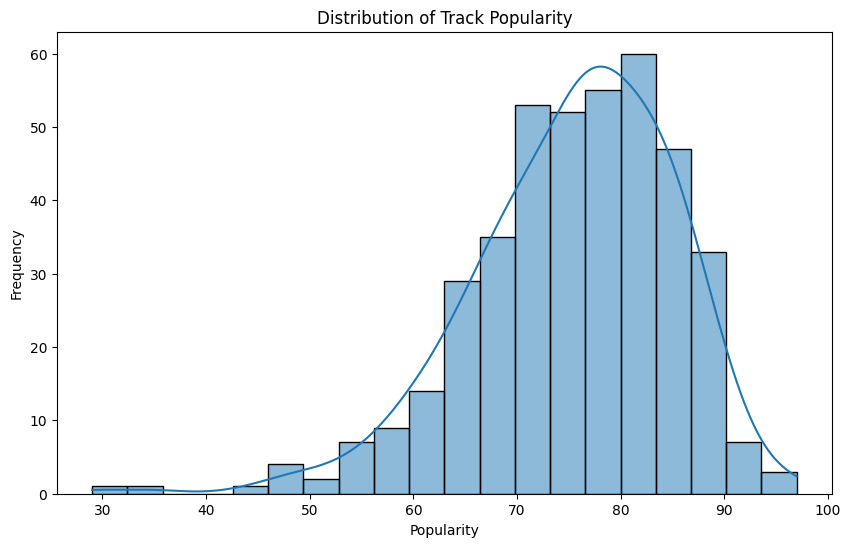

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the dataset
df = pd.read_csv('spotify.csv')

# Check for null values
if df.isnull().any().any():
    print("Null values found. Filling with median for numerical columns and mode for categorical.")
    for column in df.columns:
        if df[column].dtype in ['int64', 'float64']:
            df[column].fillna(df[column].median(), inplace=True)
        else:
            df[column].fillna(df[column].mode()[0], inplace=True)

# Check for duplicate rows
if df.duplicated().any():
    print("Duplicate rows found. Removing duplicates.")
    df = df.drop_duplicates()

# Plot histogram of popularity
plt.figure(figsize=(10, 6))
sns.histplot(df['Popularity'], bins=20, kde=True)
plt.title('Distribution of Track Popularity')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.show()

#2. What is the distribution of popularity among the tracks in the dataset? Visualize it using a histogram

Duplicate rows found. Removing duplicates.


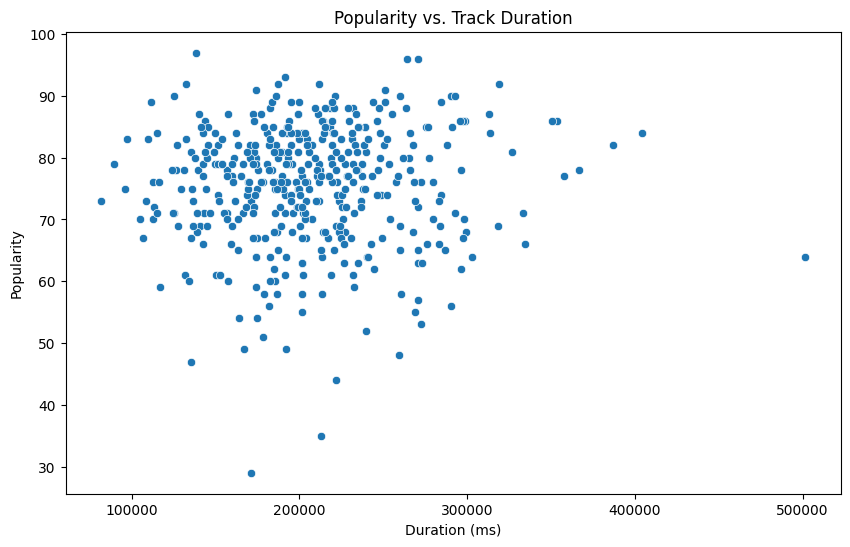

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the dataset
df = pd.read_csv('spotify.csv')

# Check for null values
if df.isnull().any().any():
    print("Null values found. Filling with median for numerical columns and mode for categorical.")
    for column in df.columns:
        if df[column].dtype in ['int64', 'float64']:
            df[column].fillna(df[column].median(), inplace=True)
        else:
            df[column].fillna(df[column].mode()[0], inplace=True)

# Check for duplicate rows
if df.duplicated().any():
    print("Duplicate rows found. Removing duplicates.")
    df = df.drop_duplicates()

# Plot scatter plot of popularity vs duration
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Duration (ms)', y='Popularity', data=df)
plt.title('Popularity vs. Track Duration')
plt.xlabel('Duration (ms)')
plt.ylabel('Popularity')
plt.show()

#3. What is the distribution of popularity among the tracks in the dataset? Visualize it using a histogram

Duplicate rows found. Removing duplicates.
Artist with the highest number of tracks:
Artist
Drake    17
Name: count, dtype: int64


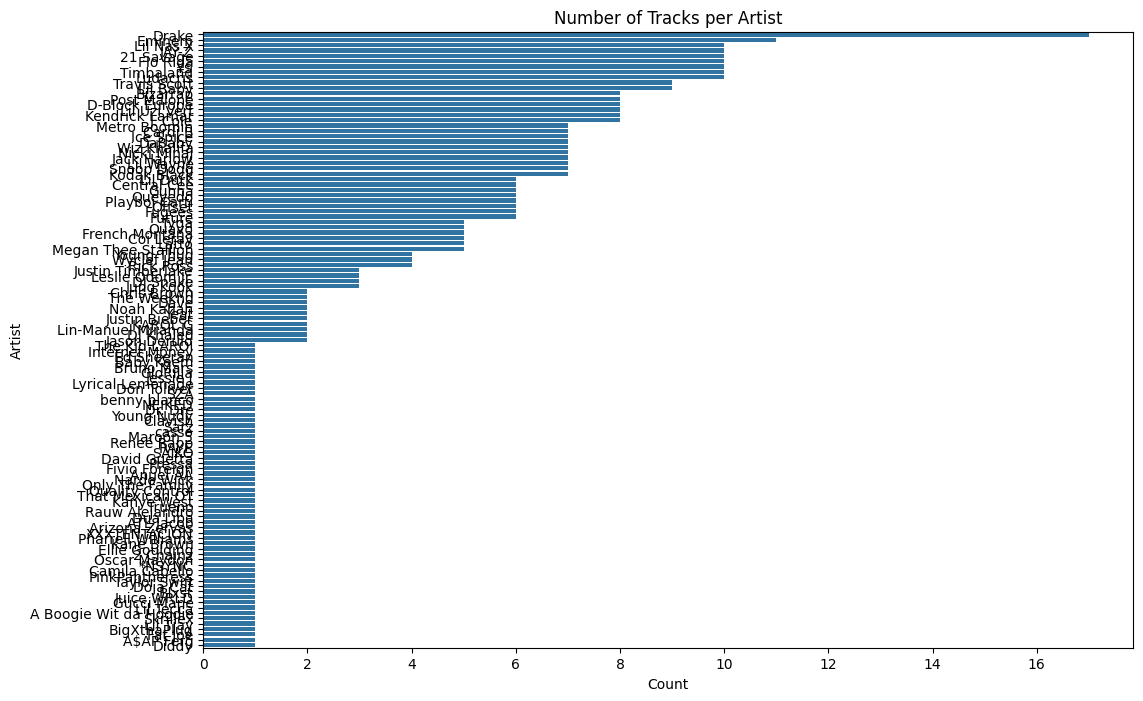

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the dataset
df = pd.read_csv('spotify.csv')

# Check for null values
if df.isnull().any().any():
    print("Null values found. Filling with median for numerical columns and mode for categorical.")
    for column in df.columns:
        if df[column].dtype in ['int64', 'float64']:
            df[column].fillna(df[column].median(), inplace=True)
        else:
            df[column].fillna(df[column].mode()[0], inplace=True)

# Check for duplicate rows
if df.duplicated().any():
    print("Duplicate rows found. Removing duplicates.")
    df = df.drop_duplicates()

# Count tracks per artist
artist_counts = df['Artist'].value_counts()
print("Artist with the highest number of tracks:")
print(artist_counts.head(1))

# Plot countplot of tracks per artist
plt.figure(figsize=(12, 8))
sns.countplot(y='Artist', data=df, order=artist_counts.index)
plt.title('Number of Tracks per Artist')
plt.xlabel('Count')
plt.ylabel('Artist')
plt.show()

#4. Which artist has the highest number of tracks in the dataset? Display the count of tracks for each artist using a countplot

In [58]:
import pandas as pd

# Read the dataset
df = pd.read_csv('spotify.csv')

# Check for null values
if df.isnull().any().any():
    print("Null values found. Filling with median for numerical columns and mode for categorical.")
    for column in df.columns:
        if df[column].dtype in ['int64', 'float64']:
            df[column].fillna(df[column].median(), inplace=True)
        else:
            df[column].fillna(df[column].mode()[0], inplace=True)

# Check for duplicate rows
if df.duplicated().any():
    print("Duplicate rows found. Removing duplicates.")
    df = df.drop_duplicates()

# Sort by popularity and select top 5 least popular tracks
least_popular = df[['Artist', 'Track Name', 'Popularity']].sort_values(by='Popularity').head(5)
print("Top 5 least popular tracks:")
print(least_popular)

Duplicate rows found. Removing duplicates.
Top 5 least popular tracks:
             Artist                     Track Name  Popularity
207          Pressa  Attachments (feat. Coi Leray)          29
231   Justin Bieber                     Intentions          35
413  French Montana                Splash Brothers          44
225        Lil Baby                  On Me - Remix          47
407     Wyclef Jean      911 (feat. Mary J. Blige)          48


#5. What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each

In [59]:
import pandas as pd

# Read the dataset
df = pd.read_csv('spotify.csv')

# Check for null values
if df.isnull().any().any():
    print("Null values found. Filling with median for numerical columns and mode for categorical.")
    for column in df.columns:
        if df[column].dtype in ['int64', 'float64']:
            df[column].fillna(df[column].median(), inplace=True)
        else:
            df[column].fillna(df[column].mode()[0], inplace=True)

# Check for duplicate rows
if df.duplicated().any():
    print("Duplicate rows found. Removing duplicates.")
    df = df.drop_duplicates()

# Get top 5 artists by track count
top_artists = df['Artist'].value_counts().head(5).index

# Calculate average popularity for each of the top 5 artists
avg_popularity = df[df['Artist'].isin(top_artists)][['Artist', 'Popularity']].groupby('Artist').mean().reset_index()
print("Average popularity for top 5 most popular artists:")
print(avg_popularity)

# Identify artist with highest average popularity
highest_avg = avg_popularity.loc[avg_popularity['Popularity'].idxmax()]
print("\nArtist with highest average popularity:")
print(highest_avg)

Duplicate rows found. Removing duplicates.
Average popularity for top 5 most popular artists:
      Artist  Popularity
0  21 Savage   83.800000
1      Drake   82.882353
2     Eminem   83.636364
3      JAY-Z   77.900000
4  Lil Nas X   75.900000

Artist with highest average popularity:
Artist        21 Savage
Popularity         83.8
Name: 0, dtype: object


#6. Among the top 5 most popular artists, which artist has the highest popularity on average? Calculate and display the average popularity for each artist

In [60]:
import pandas as pd

# Read the dataset
df = pd.read_csv('spotify.csv')

# Check for null values
if df.isnull().any().any():
    print("Null values found. Filling with median for numerical columns and mode for categorical.")
    for column in df.columns:
        if df[column].dtype in ['int64', 'float64']:
            df[column].fillna(df[column].median(), inplace=True)
        else:
            df[column].fillna(df[column].mode()[0], inplace=True)

# Check for duplicate rows
if df.duplicated().any():
    print("Duplicate rows found. Removing duplicates.")
    df = df.drop_duplicates()

# Get top 5 artists by track count
top_artists = df['Artist'].value_counts().head(5).index

# Find most popular track for each top artist
most_popular_tracks = df[df['Artist'].isin(top_artists)][['Artist', 'Track Name', 'Popularity']].sort_values(by=['Artist', 'Popularity'], ascending=[True, False]).groupby('Artist').first().reset_index()
print("Most popular tracks for top 5 artists:")
print(most_popular_tracks)

Duplicate rows found. Removing duplicates.
Most popular tracks for top 5 artists:
      Artist                               Track Name  Popularity
0  21 Savage                                   redrum          96
1      Drake  Rich Baby Daddy (feat. Sexyy Red & SZA)          92
2     Eminem                               Without Me          90
3      JAY-Z                          Ni**as In Paris          86
4  Lil Nas X                        THATS WHAT I WANT          81


#7. For the top 5 most popular artists, what are their most popular tracks? List the track name for each artist

Duplicate rows found. Removing duplicates.


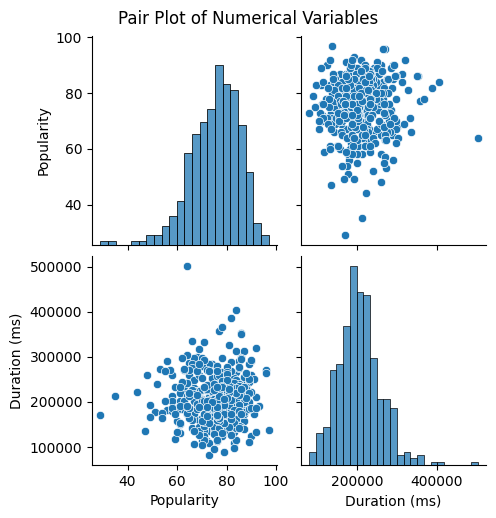

In [61]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read the dataset
df = pd.read_csv('spotify.csv')

# Check for null values
if df.isnull().any().any():
    print("Null values found. Filling with median for numerical columns and mode for categorical.")
    for column in df.columns:
        if df[column].dtype in ['int64', 'float64']:
            df[column].fillna(df[column].median(), inplace=True)
        else:
            df[column].fillna(df[column].mode()[0], inplace=True)

# Check for duplicate rows
if df.duplicated().any():
    print("Duplicate rows found. Removing duplicates.")
    df = df.drop_duplicates()

# Select numerical columns
numerical_cols = ['Popularity', 'Duration (ms)']

# Create pair plot
sns.pairplot(df[numerical_cols])
plt.suptitle('Pair Plot of Numerical Variables', y=1.02)
plt.show()

#8. Visualize relationships between multiple numerical variables simultaneously using a pair plot

Duplicate rows found. Removing duplicates.


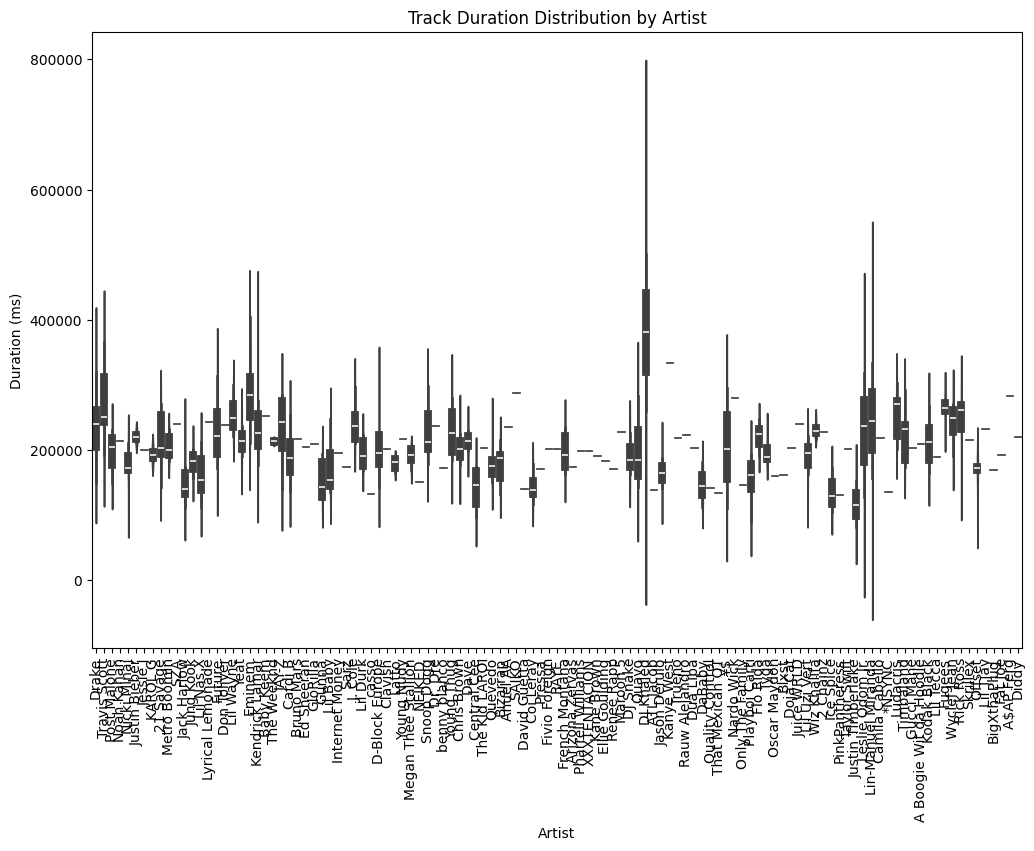

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the dataset
df = pd.read_csv('spotify.csv')

# Check for null values
if df.isnull().any().any():
    print("Null values found. Filling with median for numerical columns and mode for categorical.")
    for column in df.columns:
        if df[column].dtype in ['int64', 'float64']:
            df[column].fillna(df[column].median(), inplace=True)
        else:
            df[column].fillna(df[column].mode()[0], inplace=True)

# Check for duplicate rows
if df.duplicated().any():
    print("Duplicate rows found. Removing duplicates.")
    df = df.drop_duplicates()

# Plot violin plot of duration by artist
plt.figure(figsize=(12, 8))
sns.violinplot(x='Artist', y='Duration (ms)', data=df)
plt.title('Track Duration Distribution by Artist')
plt.xlabel('Artist')
plt.ylabel('Duration (ms)')
plt.xticks(rotation=90)
plt.show()

#9. Does the duration of tracks vary significantly across different artists? Explore this visually using a box plot or violin plot

Duplicate rows found. Removing duplicates.


/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 17.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 11.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 37.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 14.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 20.0% of the points cannot be plac

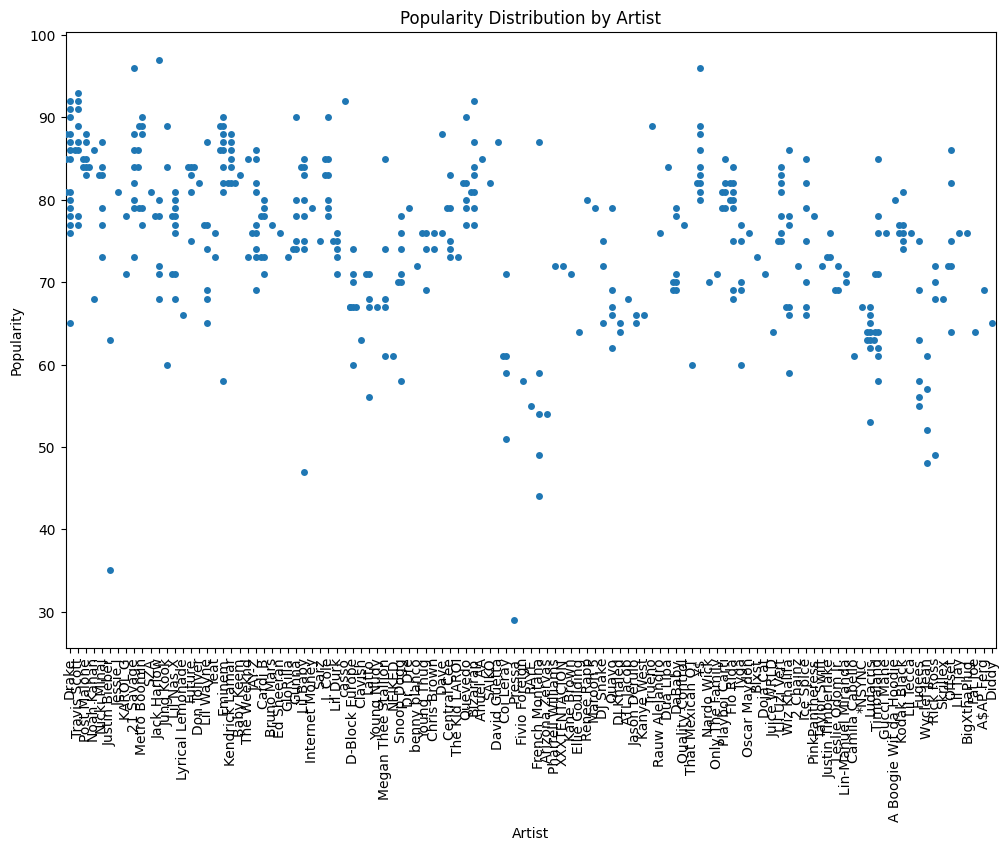

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the dataset
df = pd.read_csv('spotify.csv')

# Check for null values
if df.isnull().any().any():
    print("Null values found. Filling with median for numerical columns and mode for categorical.")
    for column in df.columns:
        if df[column].dtype in ['int64', 'float64']:
            df[column].fillna(df[column].median(), inplace=True)
        else:
            df[column].fillna(df[column].mode()[0], inplace=True)

# Check for duplicate rows
if df.duplicated().any():
    print("Duplicate rows found. Removing duplicates.")
    df = df.drop_duplicates()

# Plot swarm plot of popularity by artist
plt.figure(figsize=(12, 8))
sns.swarmplot(x='Artist', y='Popularity', data=df)
plt.title('Popularity Distribution by Artist')
plt.xlabel('Artist')
plt.ylabel('Popularity')
plt.xticks(rotation=90)
plt.show()

#10. How does the distribution of track popularity vary for different artists? Visualize this using a swarm plot or a violin plot.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
try:
    df = pd.read_csv('spotify.csv')
except FileNotFoundError:
    print("Error: spotify.csv not found. Please ensure the file is in the correct directory.")
    exit()

# The 'artists' column can contain multiple artists in a list-like string format.
# This function extracts the first artist from the string.
def extract_first_artist(artists_str):
    try:
        # Safely evaluate the string as a Python literal (list)
        artists_list = eval(artists_str)
        if isinstance(artists_list, list) and len(artists_list) > 0:
            # Return the first artist in the list
            return artists_list[0]
        else:
            # If the list is empty or not a list, return None
            return None
    except (SyntaxError, TypeError, NameError):
        # If the string is not a list-like format, treat it as a single artist name
        return artists_str

# Apply the function to create a new column 'primary_artist'
df['primary_artist'] = df['artists'].apply(extract_first_artist)

# Filter out any rows where primary_artist could not be extracted (e.g., if the original 'artists' column was empty or malformed)
df_filtered = df.dropna(subset=['primary_artist'])

# Get the top 15 artists by the number of tracks they have in the dataset
# This ensures we visualize artists with a significant presence in the data.
top_artists = df_filtered['primary_artist'].value_counts().nlargest(15).index

# Filter the DataFrame to include only tracks from these top artists
df_top_artists = df_filtered[df_filtered['primary_artist'].isin(top_artists)]

# Create the violin plot
# A violin plot shows the distribution of quantitative data across several categories.
# It is similar to a box plot but also shows the probability density of the data at different values.
plt.figure(figsize=(14, 8)) # Set the figure size for better readability
sns.violinplot(
    x='primary_artist',  # Artists on the x-axis
    y='popularity',      # Popularity on the y-axis
    data=df_top_artists, # Data to use for plotting
    inner='quartile',    # Show quartiles inside the violins
    palette='viridis'    # Choose a color palette for the violins
)

# Rotate x-axis labels for better readability, especially with long artist names
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Track Popularity for Top 15 Artists') # Set the plot title
plt.xlabel('Artist') # Label for the x-axis
plt.ylabel('Popularity') # Label for the y-axis

# Adjust layout to prevent labels from overlapping
plt.tight_layout()
plt.show() # Display the plot
